In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [9]:
y = np.random.randn(1000)

In [10]:
fft_y = np.fft.fft(y)

In [11]:
ifft_y = np.copy(fft_y)
ifft_y[450:-450] = 0

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


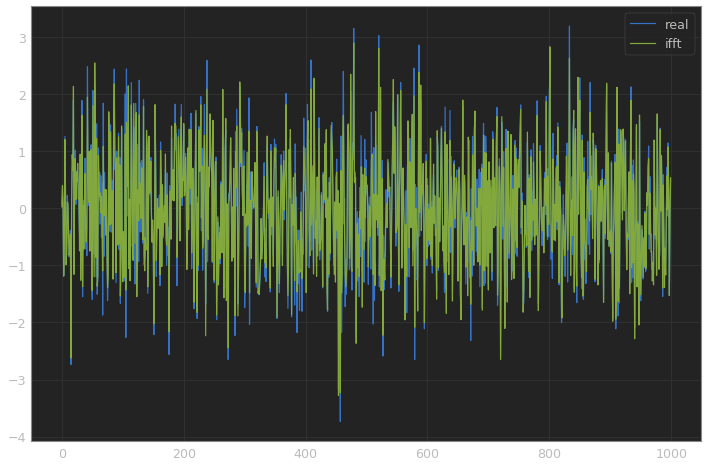

In [12]:
plt.plot(y, label="real")
plt.plot(np.fft.ifft(ifft_y), label="ifft")
plt.legend()

In [13]:
x = np.linspace(-3, 3, 300)
y = np.abs(x[:100]) - .5
y = np.concatenate((y, np.power(x[100:-100], 2) * .5))
y = np.concatenate((y, np.abs(x[-100:]) - .5))

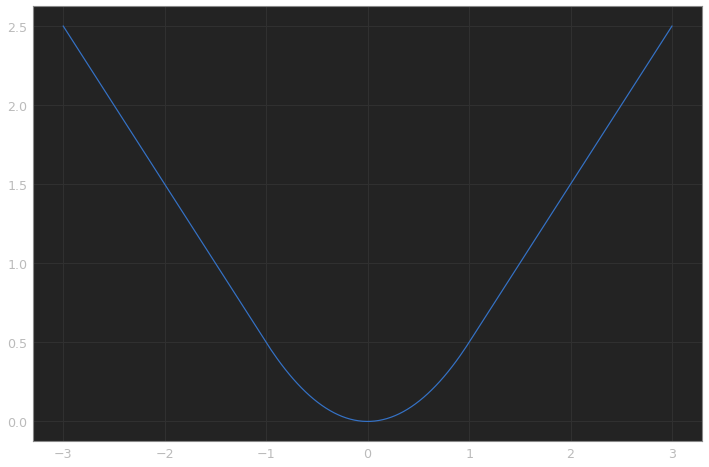

In [8]:
plt.plot(x, y)

In [1]:
%%latex

\begin{array}{ll}

\text{Softmax}(x_{i}) = \frac{exp(x_i)}{\sum_j exp(x_j)}

\end{array}

<IPython.core.display.Latex object>

In [4]:
%%latex
\begin{array}{ll}
r = \sigma(W_{ir} x + b_{ir} + W_{hr} h + b_{hr}) \\
z = \sigma(W_{iz} x + b_{iz} + W_{hz} h + b_{hz}) \\
n = \tanh(W_{in} x + b_{in} + r * (W_{hn} h + b_{hn})) \\
h' = (1 - z) * n + z * h
\end{array}

<IPython.core.display.Latex object>

In [5]:
%%latex
\begin{array}{ll}
H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]\times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor

W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]\times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor
\end{array}

<IPython.core.display.Latex object>

In [10]:
from scipy.signal import lfilter

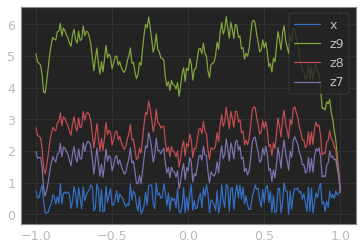

In [16]:
t = np.linspace(-1, 1, 201) 
# x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))
x = np.random.rand(201)

z_9 = lfilter([1], [1, -.9], x[::-1])[::-1]
z_8 = lfilter([1], [1, -.8], x[::-1])[::-1]
z_7 = lfilter([1], [1, -.7], x[::-1])[::-1]

plt.plot(t, x)
plt.plot(t, z_9)
plt.plot(t, z_8)
plt.plot(t, z_7)
plt.legend(['x', 'z9', 'z8', 'z7'], loc='best')

plt.show()

In [15]:
x

array([-2.19891827,  0.316638  ,  1.98343607,  0.12268127,  0.61666547,
        0.36071186, -0.87963379,  0.48756717,  0.4608583 ,  0.75983196,
        0.34770264, -0.46523606,  1.8410659 , -0.54376008, -1.58491507,
       -0.10546665,  0.72566069, -0.12272159,  1.88465048,  0.32407901,
       -2.709428  ,  0.03532932, -1.51379269,  1.30034615,  1.02907752,
        0.46537914, -0.24850759, -0.60106599,  0.11828789,  0.8778069 ,
       -0.96747625, -0.28768423, -1.03437298, -1.4089241 , -0.6687049 ,
       -1.04959916,  0.4861789 ,  0.14375933, -1.6748145 ,  0.3901386 ,
       -0.01273721,  1.49289557,  0.80721113, -0.47167209, -0.47172138,
        0.79474589, -1.29958022, -0.19370611,  0.97366483,  0.22925148,
        0.31560762, -1.29467013, -0.56483554,  0.60321668, -0.71009354,
        0.04181677,  0.37288432,  0.40434321, -0.6737002 ,  0.53464771,
        0.71407354, -0.63076355, -0.20606171,  1.09293267, -1.04044316,
       -0.31432108, -0.476028  ,  1.1009803 , -2.50274495, -1.06

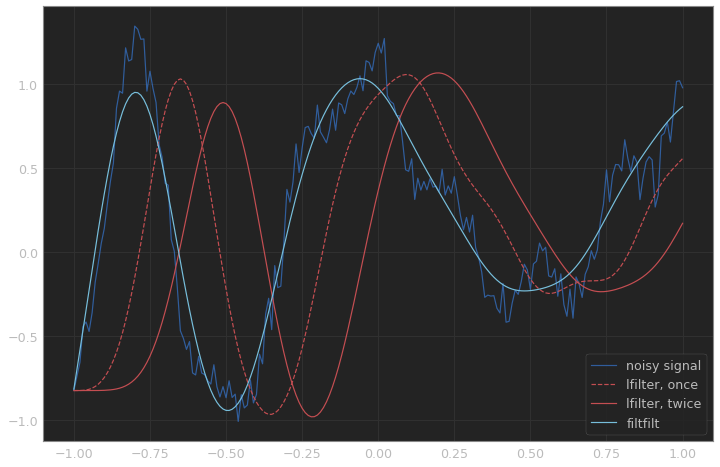

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

b, a = signal.butter(3, 0.05, )

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

y = signal.filtfilt(b, a, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'c')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

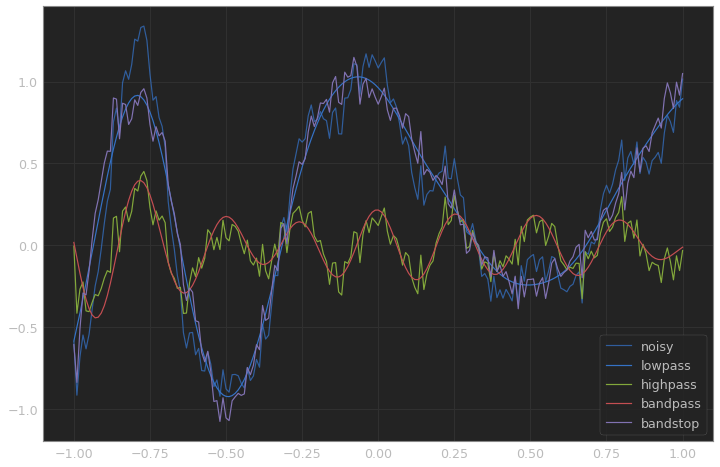

In [10]:
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

b1, a1 = signal.butter(3, 0.05, btype='lowpass')
b2, a2 = signal.butter(3, 0.05, btype='highpass')
b3, a3 = signal.butter(3, [0.05, 0.1], btype='bandpass')
b4, a4 = signal.butter(3, [0.05, 0.1], btype='bandstop')

y1 = signal.filtfilt(b1, a1, xn)
y2 = signal.filtfilt(b2, a2, xn)
y3 = signal.filtfilt(b3, a3, xn)
y4 = signal.filtfilt(b4, a4, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, y1, 'r', t, y2, 'c', t, y3, 'y', t, y4, 'g')
plt.legend(('noisy', 'lowpass', 'highpass', 'bandpass', 'bandstop'), loc='best')
plt.grid(True)
plt.show()

In [13]:
from featexp import get_univariate_plots
from featexp import get_trend_stats
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('/home/left/data/home_credit_default_risk/application_train.csv')

In [6]:
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [10]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

                                         Plots for DAYS_BIRTH                                         


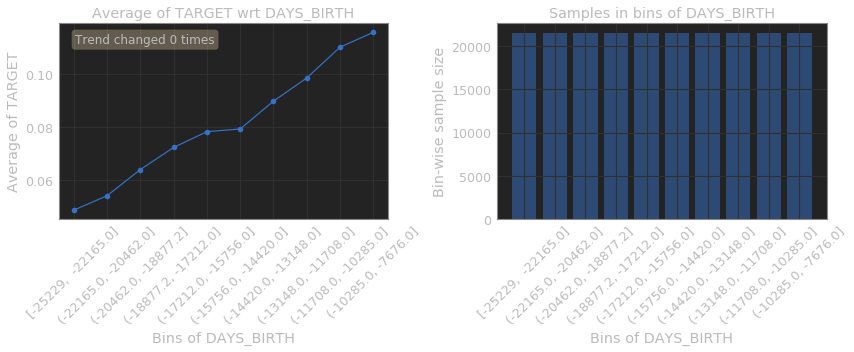

--------------------------------------------------------------------------------------------------------------




In [16]:
get_univariate_plots(data=train_data, target_col='TARGET', features_list=['DAYS_BIRTH'], bins=10)

                                       Plots for DAYS_EMPLOYED                                        
                                           Train data plots                                           


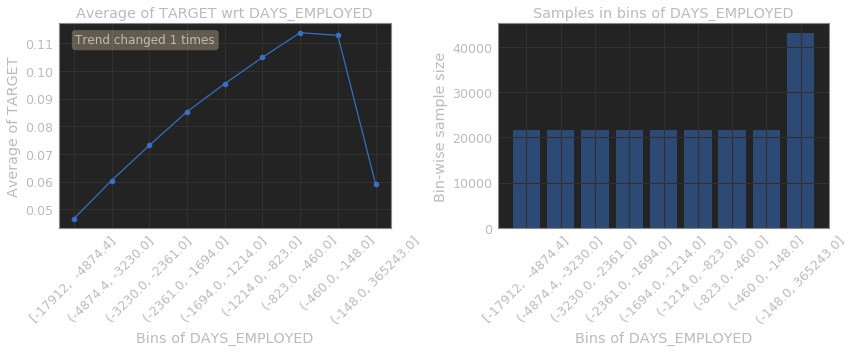

                                           Test data plots                                            


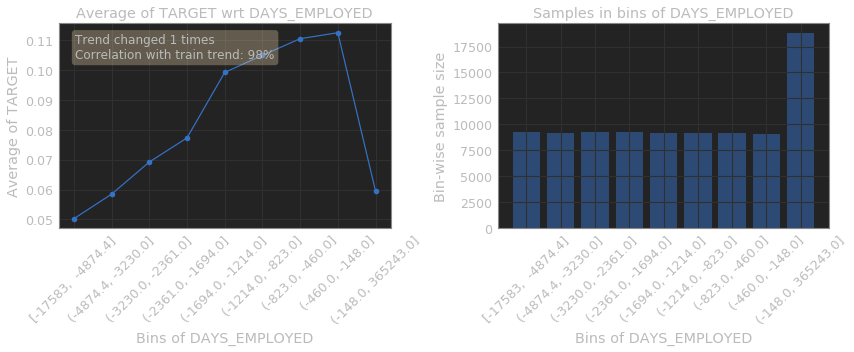

--------------------------------------------------------------------------------------------------------------




In [19]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['DAYS_EMPLOYED'], bins=10)

                                Plots for YEARS_BEGINEXPLUATATION_MODE                                
                                           Train data plots                                           


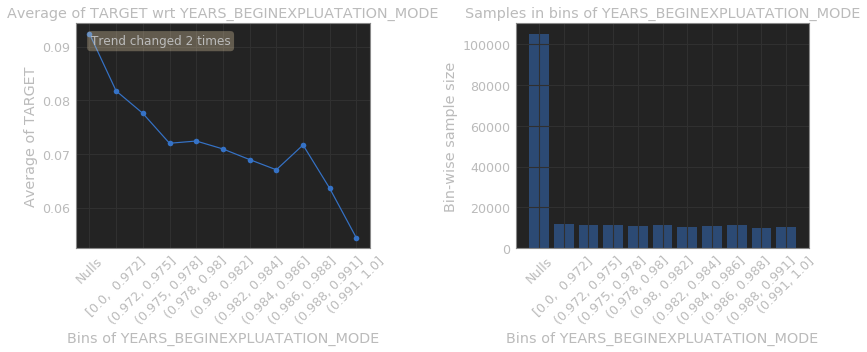

                                           Test data plots                                            


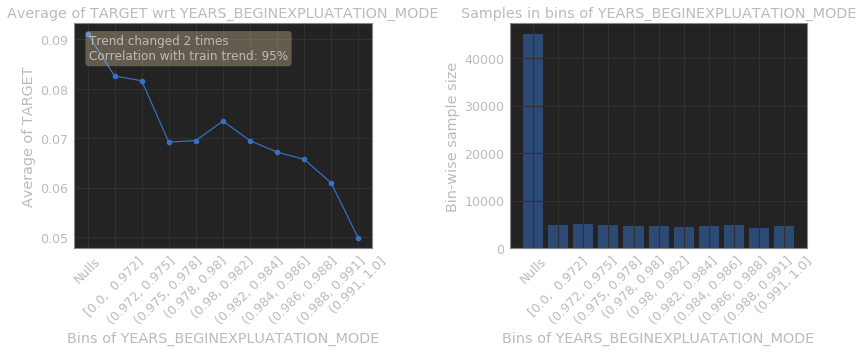

--------------------------------------------------------------------------------------------------------------




In [12]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['YEARS_BEGINEXPLUATATION_MODE'])

                                        Plots for EXT_SOURCE_1                                        
                                           Train data plots                                           


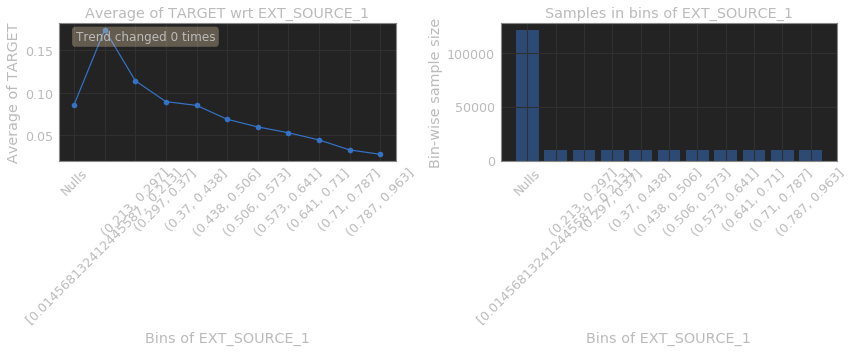

                                           Test data plots                                            


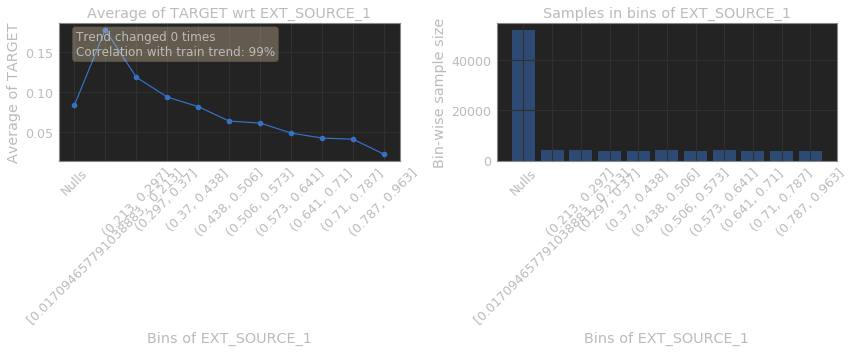

--------------------------------------------------------------------------------------------------------------




In [14]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['EXT_SOURCE_1'])